In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import models.clstm as clstm
import random
device = torch.device('cuda')
import pandas as pd

In [2]:
ld = np.load('C:/Users/chanyoung/Desktop/SRU_for_GCI-master/data/lorenz96/F_10_T_250_dataset_1.npz')
X_np = ld['X_np']
Gref = ld['Gref']
numTotalSamples = 250

In [3]:
X_np = X_np.T
X_np.shape[-1]

10

In [4]:
X_np =torch.tensor(X_np[np.newaxis], dtype = torch.float32, device = device)

In [5]:
clstm_ = clstm.cLSTM(X_np.shape[-1], hidden=100).cuda(device=device)

In [7]:
train_loss_ista = clstm.train_model_ista(
    clstm_, X_np, context=10,lam = 10, lam_ridge = 1e-2, lr=1e-3, max_iter=20000,
    check_every=50)

----------Iter = 50----------
Loss = 83.395721
Variable usage = 100.00%
----------Iter = 100----------
Loss = 34.030010
Variable usage = 100.00%
----------Iter = 150----------
Loss = 17.187557
Variable usage = 17.00%
----------Iter = 200----------
Loss = 15.644112
Variable usage = 12.00%
----------Iter = 250----------
Loss = 14.733536
Variable usage = 11.00%
----------Iter = 300----------
Loss = 14.095418
Variable usage = 12.00%
----------Iter = 350----------
Loss = 13.601033
Variable usage = 14.00%
----------Iter = 400----------
Loss = 13.190589
Variable usage = 14.00%
----------Iter = 450----------
Loss = 12.836123
Variable usage = 15.00%
----------Iter = 500----------
Loss = 12.522303
Variable usage = 17.00%
----------Iter = 550----------
Loss = 12.240027
Variable usage = 19.00%
----------Iter = 600----------
Loss = 11.982936
Variable usage = 22.00%
----------Iter = 650----------
Loss = 11.746377
Variable usage = 25.00%
----------Iter = 700----------
Loss = 11.526881
Variable usage 

----------Iter = 5750----------
Loss = 5.971427
Variable usage = 35.00%
----------Iter = 5800----------
Loss = 5.970946
Variable usage = 37.00%
----------Iter = 5850----------
Loss = 5.950933
Variable usage = 36.00%
----------Iter = 5900----------
Loss = 5.928689
Variable usage = 35.00%
----------Iter = 5950----------
Loss = 5.911499
Variable usage = 35.00%
----------Iter = 6000----------
Loss = 5.894920
Variable usage = 35.00%
----------Iter = 6050----------
Loss = 5.878982
Variable usage = 35.00%
----------Iter = 6100----------
Loss = 5.875888
Variable usage = 36.00%
----------Iter = 6150----------
Loss = 5.904115
Variable usage = 37.00%
----------Iter = 6200----------
Loss = 5.853055
Variable usage = 36.00%
----------Iter = 6250----------
Loss = 5.834275
Variable usage = 35.00%
----------Iter = 6300----------
Loss = 5.809004
Variable usage = 35.00%
----------Iter = 6350----------
Loss = 5.792624
Variable usage = 35.00%
----------Iter = 6400----------
Loss = 5.777698
Variable usage =

In [8]:
GC_ = clstm_.GC(threshold = False).cpu().data.numpy()

True variable usage = 40.00%
Estimated variable usage = 38.00%
Accuracy = 78.00%


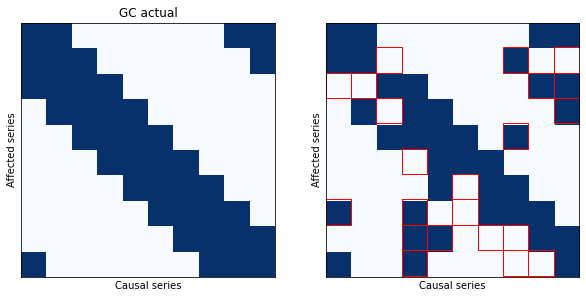

In [10]:
GC_clstm = clstm_.GC(threshold = True).cpu().data.numpy()
import matplotlib.pyplot as plt
print('True variable usage = %.2f%%' % (100 * np.mean(Gref)))
print('Estimated variable usage = %.2f%%' % (100 * np.mean(GC_clstm)))
print('Accuracy = %.2f%%' % (100 * np.mean(Gref == GC_clstm)))

# Make figures
fig, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(Gref, cmap='Blues')
axarr[0].set_title('GC actual')
axarr[0].set_ylabel('Affected series')
axarr[0].set_xlabel('Causal series')
axarr[0].set_xticks([])
axarr[0].set_yticks([])

axarr[1].imshow(GC_clstm, cmap='Blues', vmin=0, vmax=1, extent=(0, len(GC_clstm), len(GC_clstm), 0))
axarr[1].set_ylabel('Affected series')
axarr[1].set_xlabel('Causal series')
axarr[1].set_xticks([])
axarr[1].set_yticks([])

# Mark disagreements
for i in range(len(GC_clstm)):
    for j in range(len(GC_clstm)):
        if Gref[i, j] != GC_clstm[i, j]:
            rect = plt.Rectangle((j, i-0.05), 1, 1, facecolor='none', edgecolor='red', linewidth=1)
            axarr[1].add_patch(rect)

plt.show()